In [266]:
import sys
from scipy.io import loadmat
import os
import time
import numpy as np
muspDir='/home/pboord/Downloads/kaggle/musp'
dataDir=os.path.join(muspDir,'data')
dataSet='train_1'
dataSetPath=os.path.join(dataDir,dataSet)
# matFile = '1_45_1.mat'
# matPath=os.path.join(dataSetPath,matFile)
# mat files in directory
matFileList = []
for (dirpath, dirnames, filenames) in os.walk(dataSetPath):
    matFileList.extend(filenames)
    break
from IPython.display import clear_output

In [267]:
import csv
matSafe = {}
with open(os.path.join(muspDir,'train_and_test_data_labels_safe.csv')) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        matSafe[row['image']] = row['safe']

In [268]:
dataClass0 = []
dataClass1 = []
badFiles = []
time0 = time.time()
loopNr = 0
queueLen = 50
timeQueue = np.zeros((queueLen,1))
for matFile in matFileList:
    if matSafe[matFile] == '1':
        time1 = time.time()
        matPath=os.path.join(dataSetPath,matFile)
        try:
            data = loadmat(matPath)['dataStruct']['data'][0][0,]
        except ValueError:
            badFiles.append(matFile)
            continue
        goodSamples = np.logical_not(np.all(data == 0,axis=1))
        if goodSamples.sum() != 0:
            dataGood = data[goodSamples,:]
            ss = np.sum(np.square(dataGood))/np.prod(dataGood.shape)
            if str.split(matFile.split('_')[2],'.')[0] == '0':
                dataClass0.append(ss)
            else:
                dataClass1.append(ss)
        time2 = time.time()
        restart_line
        loopNr += 1
        timeQueue[loopNr % queueLen] = time2 - time1
        if loopNr > queueLen:
            print(str((len(matFileList) - loopNr)*timeQueue.mean()))
            clear_output(wait=True)
print str(time2 - time0)
print badFiles

172.037719965
['1_45_1.mat']


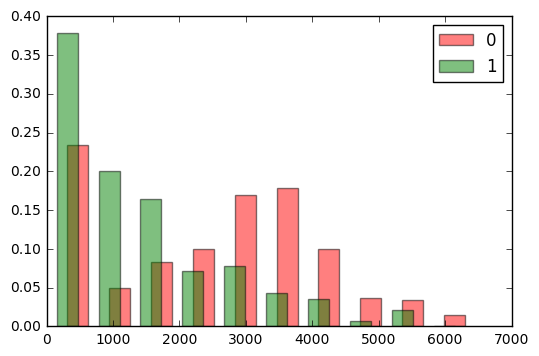

In [269]:
from matplotlib import pyplot
bin_edges = np.histogram(dataClass0 + dataClass1)[1]
width = 0.5 * (bin_edges[1] - bin_edges[0])
hist0 = np.histogram(dataClass0,bin_edges)[0]
hist1 = np.histogram(dataClass1,bin_edges)[0]
pyplot.bar(bin_edges[0:10], hist0.astype(float)/sum(hist0), width, alpha=0.5, color='r', label='0')
pyplot.bar(bin_edges[0:10], hist1.astype(float)/sum(hist1), width, align='center', alpha=0.5, color='g', label='1')
pyplot.legend(loc='upper right')
pyplot.show()

In [271]:
dataClass0 = []
dataClass1 = []
badFiles = []
time0 = time.time()
loopNr = 0
queueLen = 50
timeQueue = np.zeros((queueLen,1))
for matFile in matFileList:
    if matSafe[matFile] == '1':
        time1 = time.time()
        matPath=os.path.join(dataSetPath,matFile)
        try:
            data = loadmat(matPath)['dataStruct']['data'][0][0,]
        except ValueError:
            badFiles.append(matFile)
            continue
        goodSamples = np.logical_not(np.all(data == 0,axis=1))
        if goodSamples.sum() != 0:
            dataGood = data[goodSamples,:]
            ss = np.sum(np.square(dataGood))/np.prod(dataGood.shape)
            if ss < 600:
                if str.split(matFile.split('_')[2],'.')[0] == '0':
                    dataClass0.append(ss)
                else:
                    dataClass1.append(ss)
        time2 = time.time()
        restart_line
        loopNr += 1
        timeQueue[loopNr % queueLen] = time2 - time1
        if loopNr > queueLen:
            print(str((len(matFileList) - loopNr)*timeQueue.mean()))
            clear_output(wait=True)
print str(time2 - time0)
print badFiles

201.756026983
['1_45_1.mat']


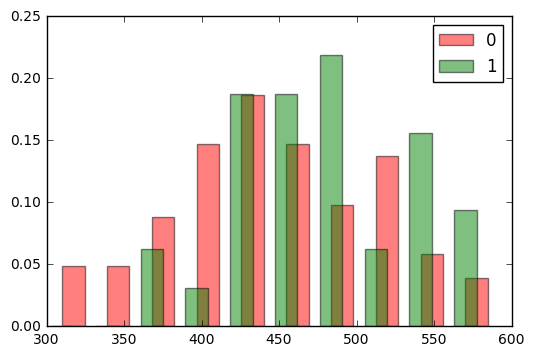

In [272]:
from matplotlib import pyplot
bin_edges = np.histogram(dataClass0 + dataClass1)[1]
width = 0.5 * (bin_edges[1] - bin_edges[0])
hist0 = np.histogram(dataClass0,bin_edges)[0]
hist1 = np.histogram(dataClass1,bin_edges)[0]
pyplot.bar(bin_edges[0:10], hist0.astype(float)/sum(hist0), width, alpha=0.5, color='r', label='0')
pyplot.bar(bin_edges[0:10], hist1.astype(float)/sum(hist1), width, align='center', alpha=0.5, color='g', label='1')
pyplot.legend(loc='upper right')
pyplot.show()

In [273]:
len(dataClass0),len(dataClass1)

(102, 32)

In [72]:
# good data indices
goodSamples = np.logical_not(np.all(data == 0,axis=1))
# diffGoodSamples = np.diff(np.concatenate(([0],goodSamples.astype(float),[0])))
# okStart = np.where(diffGoodSamples > 0)[0]
# okEnd = np.where(diffGoodSamples < 0)[0]
# okLen = okEnd - okStart

In [75]:
# sum of squares
dataGood = data[goodSamples,:]
ss = np.sum(np.square(dataGood))/np.prod(dataGood.shape)